In [4]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url="https://www.marutisuzukitruevalue.com/used-cars-in-hyderabad/1#carAge=0%2C35&page=1"
response=requests.get(url)
response

<Response [200]>

In [6]:
request_header={'Content-Type':'text/css',
                'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36',
                'Accept-Encoding':'gzip, deflate, br, zstd'
               }
response=requests.get(url,headers=request_header)
response.text

'\r\n\r\n\r\n<!DOCTYPE html>\r\n<!--[if IE 9]>\r\n    <html class="no-js lt-ie9" lang="en" prefix="og: http://ogp.me/ns#" xmlns="http://www.w3.org/1999/xhtml">\r\n<![endif]-->\r\n<!--[if gt IE 9]>\r\n<!-->\r\n<html class="no-js" lang="en" xmlns="http://www.w3.org/1999/xhtml" prefix="og: http://ogp.me/ns#">\r\n<!--<![endif]-->\r\n<head>\r\n    <!-- Start Google Tag Manager -->\r\n    <script>msildl = [];</script>\r\n    <!-- End Google Tag Manager -->\r\n    <!-- Render GTM script in Head-->\r\n    \r\n<!-- Google Tag Manager -->\r\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\r\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\r\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\r\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\r\n})(window,document,\'script\',\'msildl\',\'GTM-KZ5HNDG\');</script>\r\n<!-- End Google Tag Manager -->\r\n\r\n<!-- script add below google tag m

In [7]:
html_text=response.text
soup=BeautifulSoup(html_text)
soup.text

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBuy & Sell Pre-Owned cars with the New True Value app\nGet App\n\n\n\n\n\n\n\n\n\n\n\nSearch City\n\r\n                                Please select the location in order to get the desired result.\r\n                            \n\n\nAbout us\n\n\nSell\n\n\nSmart Finance\n\n\nShowroom Locator\n\n\nFinance\n\n\nTrue Value Hub\n\n\nCall Us 1800 102 1800\n\n\n\n\n\nहिन्दी\nEnglish\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCompare Cars\nWishlist\n\n\n login\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nहिन्दी\nEnglish\n\n\n\n\nCompare Cars\nWishlist\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n BUY\n\nBy City\n\n\nNorth\nDelhi\nJaipur\nLucknow\nGurugram\nChandigarh\n\n\nWest\nPune\nMumbai\nAhmedabad\nIndore\nSurat\n\n\nSouth\nBengaluru\nHyderabad\nChennai\nCoimbatore\nMadurai\n\n\nEast\nKolkata\nPatna\nGuwahati\nBhubneshwar\nRanchi\n

In [8]:
soup.find("div",class_="yearModelKm")


<div class="yearModelKm">
<div class="yearTxt">
                                    2021 <span>|</span> Petrol <span>|</span> 81 457 km
                                </div>
<div class="starRating">
<ul>
<li class="selected">
<i class="fas fa-star"></i>
</li>
<li class="selected">
<i class="fas fa-star"></i>
</li>
<li class="selected">
<i class="fas fa-star"></i>
</li>
<li class="selected">
<i class="fas fa-star"></i>
</li>
<li>
<i class="fas fa-star"></i>
</li>
</ul>
</div>
</div>

In [9]:
kilometers =[]
for tag in soup.find_all("div", class_="yearModelKm"):
    text = tag.get_text(strip=True)
    kms = re.findall(r'\d[\d\s]*\s?km', text)
    for km in kms:
        a=km.strip()
        print(a)
        kilometers.append(a)

81 457 km
1 45 810 km
95 768 km
99 476 km
70 989 km
1 54 718 km
1 12 819 km
70 854 km
15 334 km
1 47 721 km
78 178 km
39 257 km


In [10]:
car_name=[]
for tag in soup.find_all("div", class_="carNameSec"):  # change class name as needed
    text = tag.get_text(strip=True)
    brand = re.findall(r'^[A-Za-z0-9\-]+', text)
    print(brand[0] if brand else "")
    car_name.extend(brand)

S-Presso
Wagon
Alto
Alto
Alto
Alto
Alto
Alto
Celerio
Dzire
Celerio
Swift


In [11]:
fuels = []
for tag in soup.find_all("div", class_="yearModelKm"):
    text = tag.get_text(strip=True)
    match = re.findall(r'\|(.*?)\|', text)
    fuels.extend([m.strip() for m in match])

print(fuels)


['Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol']


In [12]:
models = []
for tag in soup.find_all("div", class_="yearModelKm"):
    text = tag.get_text(strip=True)
    match = re.findall(r'^\d{4}', text)
    models.extend(match)

print(models)


['2021', '2015', '2015', '2013', '2012', '2010', '2010', '2022', '2022', '2022', '2021', '2021']


In [13]:
print("Car_name:",len(car_name))
print("Fuel_types:",len(fuels))
print("Model:",len(models))
print("Kilometers:",len(kilometers))

Car_name: 12
Fuel_types: 12
Model: 12
Kilometers: 12


In [14]:
prices = []
for tag in soup.find_all("div", class_="priceTxt"):
    text = tag.get_text(strip=True)
    m = re.search(r'₹\s*([\d\s]+)', text)
    if m:
        prices.append(m.group(1).strip())

for p in prices:
    print(p)


3 25 000
2 95 000
2 30 000
2 00 000
1 42 500
1 25 000
1 75 000
2 97 000
4 95 000
5 50 000
4 25 000
5 50 000


In [15]:
print(len(prices))

12


In [16]:
max_len = max(len(models), len(fuels), len(kilometers), len(prices), len(car_name))
def pad(lst):
    return lst + [""] * (max_len - len(lst))

models, fuels, kms, prices, car_name = map(pad, [models, fuels, kilometers, prices, car_name])

# --- Create structured DataFrame ---
df = pd.DataFrame({
    "Model": models,
    "Fuel": fuels,
    "KM": kms,
    "Price": prices,
    "Brand_Name": car_name
})

# Clean up spaces
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

df.head(12)

,Model,Fuel,KM,Price,Brand_Name
0,2021,Petrol,81 457 km,3 25 000,S-Presso
1,2015,Petrol,1 45 810 km,2 95 000,Wagon
2,2015,Petrol,95 768 km,2 30 000,Alto
3,2013,Petrol,99 476 km,2 00 000,Alto
4,2012,Petrol,70 989 km,1 42 500,Alto
5,2010,Petrol,1 54 718 km,1 25 000,Alto
6,2010,Petrol,1 12 819 km,1 75 000,Alto
7,2022,Petrol,70 854 km,2 97 000,Alto
8,2022,Petrol,15 334 km,4 95 000,Celerio
9,2022,Petrol,1 47 721 km,5 50 000,Dzire


In [17]:
for i in range(1,5):
    url=f"https://www.marutisuzukitruevalue.com/used-cars-in-hyderabad/1#carAge=0%2C35&page={i}"
    response=requests.get(url)
    html_code=response.text
    soup=BeautifulSoup(html_code)
    print(soup.text)























































































Buy & Sell Pre-Owned cars with the New True Value app
Get App











Search City

                                Please select the location in order to get the desired result.
                            


About us


Sell


Smart Finance


Showroom Locator


Finance


True Value Hub


Call Us 1800 102 1800





हिन्दी
English




















Compare Cars
Wishlist


 login




















हिन्दी
English




Compare Cars
Wishlist


 














 BUY

By City


North
Delhi
Jaipur
Lucknow
Gurugram
Chandigarh


West
Pune
Mumbai
Ahmedabad
Indore
Surat


South
Bengaluru
Hyderabad
Chennai
Coimbatore
Madurai


East
Kolkata
Patna
Guwahati
Bhubneshwar
Ranchi

View All Cities



By Model


Swift
Eeco
Maruti 800
Vitara Brezza


Alto 800
Wagon R
Alto
Baleno


Ertiga
Swift Dzire
Omni
Celerio

View All Models



By Price


Less than 2 Lakh
2 Lakh - 4 Lakh
4 Lakh - 6 Lakh
More than 6 Lakh




By Fuel 

In [18]:
 for tag in soup.find_all("div", class_="yearModelKm"):
        text = tag.get_text(strip=True)
        kms = re.findall(r'\d[\d\s]*\s?km', text)
        for km in kms:
            clean_km = km.replace("km", "").strip()
            kilometers.append(clean_km)

print(kilometers)

['81 457 km', '1 45 810 km', '95 768 km', '99 476 km', '70 989 km', '1 54 718 km', '1 12 819 km', '70 854 km', '15 334 km', '1 47 721 km', '78 178 km', '39 257 km', '81 457', '1 45 810', '95 768', '99 476', '70 989', '1 54 718', '1 12 819', '70 854', '15 334', '1 47 721', '78 178', '39 257']


In [19]:
for tag in soup.find_all("div", class_="priceTxt"):
    text = tag.get_text(strip=True)
    match = re.search(r'₹\s*([\d\s]+)', text)
    if match:
        price = match.group(1).strip()
        if price not in prices:   # avoid duplicates
            prices.append(price)

print(prices)

['3 25 000', '2 95 000', '2 30 000', '2 00 000', '1 42 500', '1 25 000', '1 75 000', '2 97 000', '4 95 000', '5 50 000', '4 25 000', '5 50 000']


In [20]:
for tag in soup.find_all("div", class_="yearModelKm"):
    text = tag.get_text(strip=True)
    match = re.findall(r'^\d{4}', text)
    for m in match:
        clean_model = m.strip()
        models.append(clean_model)
for tag in soup.find_all("div", class_="yearTxt"):
    text = tag.get_text(strip=True)
    match = re.findall(r'^\d{4}', text)
    for m in match:
        clean_model = m.strip()
        models.append(clean_model)
print(models)

['2021', '2015', '2015', '2013', '2012', '2010', '2010', '2022', '2022', '2022', '2021', '2021', '2021', '2015', '2015', '2013', '2012', '2010', '2010', '2022', '2022', '2022', '2021', '2021', '2021', '2015', '2015', '2013', '2012', '2010', '2010', '2022', '2022', '2022', '2021', '2021']


In [21]:
import re
import requests
from bs4 import BeautifulSoup

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
fuels = []

for i in range(1, 5):  # change range for more pages
    url = f"https://www.marutisuzukitruevalue.com/used-cars-in-hyderabad/1#carAge=0%2C35&page={i}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    for tag in soup.find_all("div", class_="yearModelKm"):
        text = tag.get_text(strip=True)
        match = re.findall(r'\|(.*?)\|', text)
        for m in match:
            fuels.append(m.strip())



print(fuels)


['Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol']


In [22]:
for tag in soup.find_all("div", class_="leftSec"):  # update class if needed
    text = tag.get_text(strip=True)
    match = re.findall(r'^[A-Za-z0-9\-]+', text)
    for m in match:
        car_name.append(m.strip())
print(car_name)

['S-Presso', 'Wagon', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Celerio', 'Dzire', 'Celerio', 'Swift', 'S-Presso', 'Wagon', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Celerio', 'Dzire', 'Celerio', 'Swift', 'Car', 'Second', 'Second', 'Second', 'Second', 'Second', 'Second', 'Second', 'Second', 'Second', 'Second']


In [23]:
max_len = max(len(models), len(fuels), len(kilometers), len(prices), len(car_name))

def pad(lst):
    return lst + [""] * (max_len - len(lst))

models      = pad(models)
fuels       = pad(fuels)
kilometers  = pad(kilometers)
prices      = pad(prices)
car_name    = pad(car_name)


# --- Create DataFrame ---
df = pd.DataFrame({
    "Model": models,
    "Fuel": fuels,
    "KM": kilometers,
    "Price": prices,
    "Brand_Name": car_name
})

# --- Clean formatting ---
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# --- Display and save ---
df


,Model,Fuel,KM,Price,Brand_Name
0,2021,Petrol,81 457 km,3 25 000,S-Presso
1,2015,Petrol,1 45 810 km,2 95 000,Wagon
2,2015,Petrol,95 768 km,2 30 000,Alto
3,2013,Petrol,99 476 km,2 00 000,Alto
4,2012,Petrol,70 989 km,1 42 500,Alto
5,2010,Petrol,1 54 718 km,1 25 000,Alto
6,2010,Petrol,1 12 819 km,1 75 000,Alto
7,2022,Petrol,70 854 km,2 97 000,Alto
8,2022,Petrol,15 334 km,4 95 000,Celerio
9,2022,Petrol,1 47 721 km,5 50 000,Dzire


In [25]:
df.to_excel("used_car_data_cleaned.xlsx", index=False)

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       48 non-null     object
 1   Fuel        48 non-null     object
 2   KM          48 non-null     object
 3   Price       48 non-null     object
 4   Brand_Name  48 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB
None


In [25]:
print(df.describe())

       Model    Fuel  KM Price Brand_Name
count     48      48  48    48         48
unique     7       1  25    12          9
top           Petrol                     
freq      12      48  24    36         13


In [26]:
print(df.shape)

(48, 5)


In [27]:
print(df.isnull().sum())

Model         0
Fuel          0
KM            0
Price         0
Brand_Name    0
dtype: int64


In [28]:
df=df.dropna()

In [29]:
df = df.fillna(df.mean(numeric_only=True))

In [30]:
print("After Cleaning Shape:", df.shape)
print(df.describe())

After Cleaning Shape: (48, 5)
       Model    Fuel  KM Price Brand_Name
count     48      48  48    48         48
unique     7       1  25    12          9
top           Petrol                     
freq      12      48  24    36         13


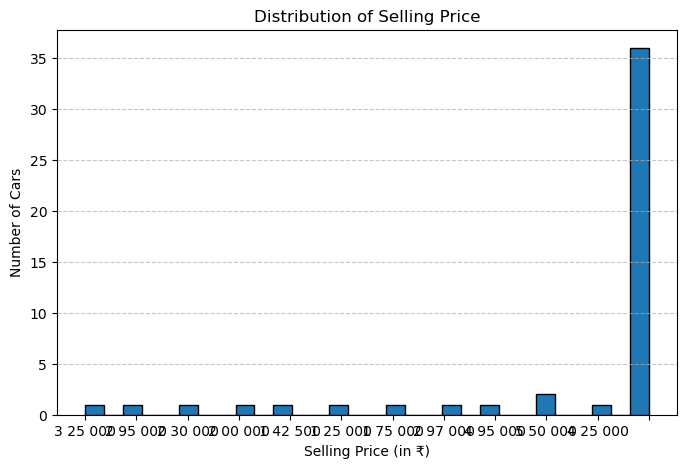

In [31]:
plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (in ₹)")
plt.ylabel("Number of Cars")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

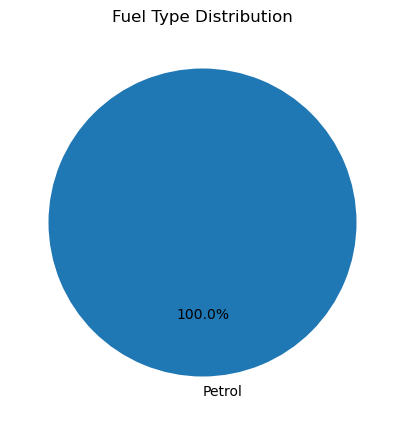

In [32]:
plt.figure(figsize=(5,5))
df['Fuel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Fuel Type Distribution")
plt.ylabel("")
plt.show()

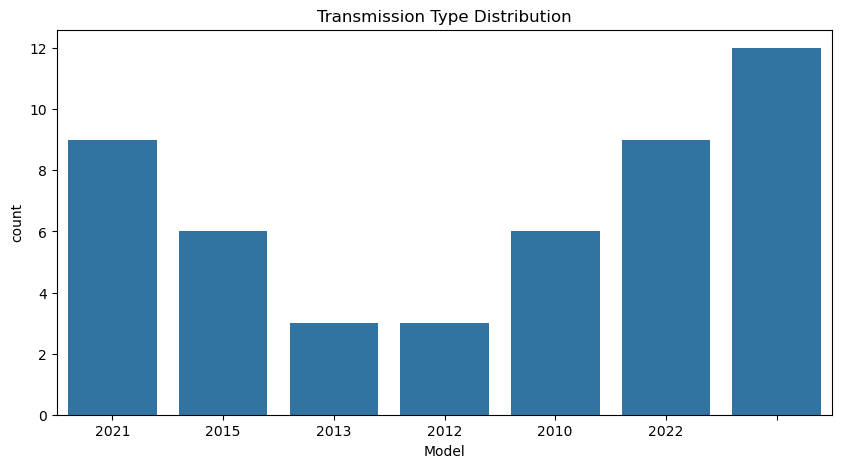

In [33]:
# Count of transmission types
plt.figure(figsize=(10,5))
sns.countplot(x='Model', data=df)
plt.title("Transmission Type Distribution")
plt.show()

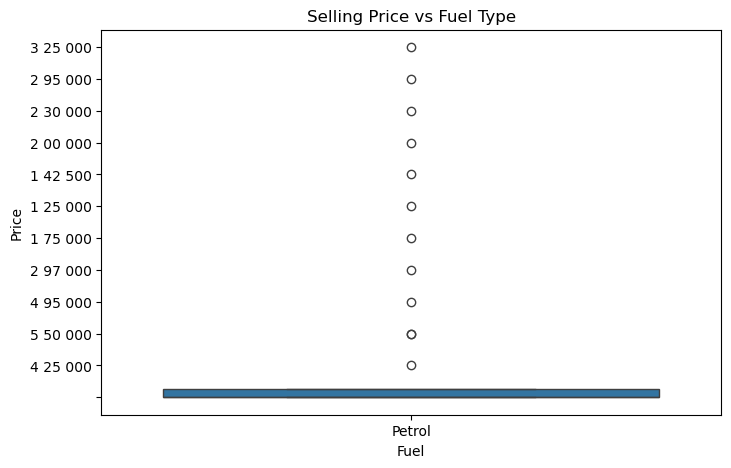

In [34]:
# Box plot showing relationship between fuel type and selling price
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel', y='Price', data=df)
plt.title("Selling Price vs Fuel Type")
plt.show()

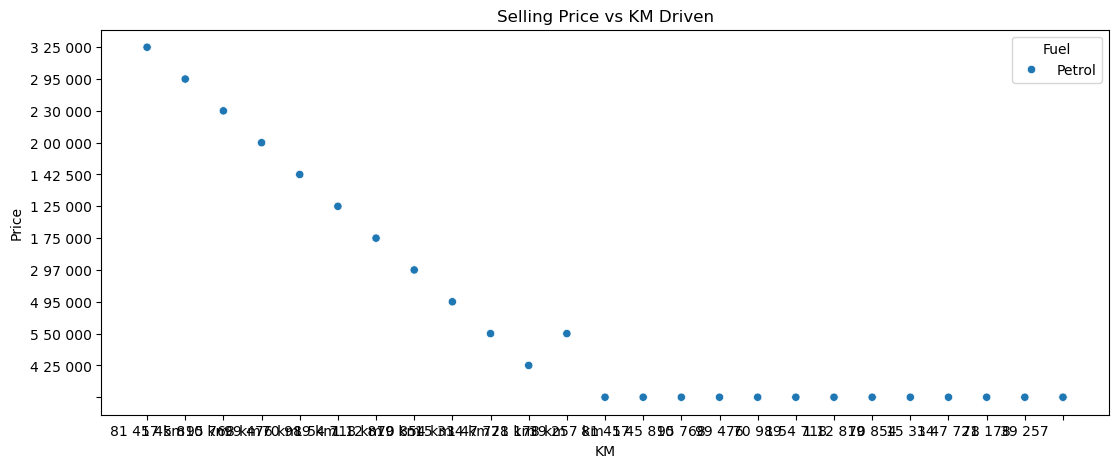

In [37]:
# Scatter plot showing relation between kilometers driven and price
plt.figure(figsize=(13, 5))
sns.scatterplot(x='KM', y='Price', hue='Fuel', data=df)
plt.title("Selling Price vs KM Driven")
plt.show()

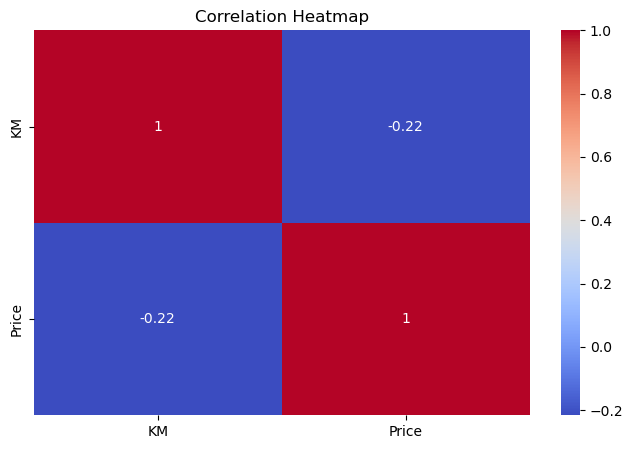

In [237]:
df['KM'] = df['KM'].str.replace(r'\D', '', regex=True)
df['Price'] = df['Price'].str.replace(r'\D', '', regex=True)

# Convert safely to float (invalid entries become NaN)
df['KM'] = pd.to_numeric(df['KM'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# --- Drop rows with all NaNs in numeric columns ---
df = df.dropna(subset=['KM', 'Price'], how='all')

# --- Plot heatmap ---
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()